# Chapter 4

In [1]:
import numpy as np

In [2]:
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [3]:
%time
for _ in range(10): 
    my_arr2 = my_arr * 2

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs


In [4]:
%time
for _ in range(10): 
    my_list2 = [i * 2 for i in my_list]

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.05 µs


NumPy-based algorithms are generally 10 to 100 times faster (or more) than their pure Python counterparts and use significantly less memory.

## 4.1   The NumPy ndarray: A Multidimensional Array Object

In [5]:
np.random.seed(1234)
data = np.random.randn(2, 3)
data

array([[ 0.47143516, -1.19097569,  1.43270697],
       [-0.3126519 , -0.72058873,  0.88716294]])

In [6]:
data * 10

array([[  4.71435164, -11.90975695,  14.32706968],
       [ -3.12651896,  -7.20588733,   8.8716294 ]])

In [7]:
data + data

array([[ 0.94287033, -2.38195139,  2.86541394],
       [-0.62530379, -1.44117747,  1.77432588]])

In [8]:
print(data.shape)
print(data.dtype)

(2, 3)
float64


### Creating ndarrays

In [9]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [10]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [11]:
print(arr2.ndim)
print(arr2.shape)

2
(2, 4)


In [12]:
print(arr1.dtype)
print(arr2.dtype)

float64
int64


`zeros` and `ones` create arrays of 0s or 1s, respectively, with a given length or shape. `empty` creates an array without initializing its values to any particular value.

In [13]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
np.ones(6)

array([1., 1., 1., 1., 1., 1.])

In [15]:
np.zeros((5, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [16]:
np.empty((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

It’s not safe to assume that `np.empty` will return an array of all zeros. In some cases, it may return uninitialized “garbage” values.

In [17]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [18]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Data Types for ndarrays

The *data type* or `dtype` is a special object containing the information (or metadata, data about data) the ndarray needs to interpret a chunk of memory as a particular type of data:

In [19]:
arr1 = np.array([1, 2, 3], dtype = np.float64)
arr2 = np.array([1, 2, 3], dtype = np.int64)

In [20]:
print(arr1.dtype)
print(arr2.dtype)

float64
int64


You can explicitly convert or *cast* an array from one dtype to another using ndarray’s `astype` method:

In [21]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int64')

In [22]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

If I cast some floating-point numbers to be of integer dtype, the decimal part will be truncated:

In [23]:
arr = np.array([3.2, -1.7, -0.4, 5.5, 8.3])
arr

array([ 3.2, -1.7, -0.4,  5.5,  8.3])

In [24]:
arr = arr.astype(np.int64)
arr

array([ 3, -1,  0,  5,  8])

It’s important to be cautious when using the `numpy.string_` type, as string data in NumPy is fixed size and may truncate input without warning. pandas has more intuitive out-of-the-box behavior on non-numeric data.

Calling `astype` *always* creates a new array (a copy of the data), even if the new dtype is the same as the old dtype.

### Arithmetic with NumPy Arrays

Arrays are important because they enable you to express batch operations on data without writing any for loops. NumPy users call this *vectorization*. Any arithmetic operations between equal-size arrays applies the operation element-wise:

In [25]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [26]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [27]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

Comparisons between arrays of the same size yield boolean arrays:

In [28]:
arr2 = np.array([[1.2, 0.7, 4.4], [8.9, 5.3, 2.]])
arr2

array([[1.2, 0.7, 4.4],
       [8.9, 5.3, 2. ]])

In [29]:
arr < arr2

array([[ True, False,  True],
       [ True,  True, False]])

Operations between differently sized arrays is called *broadcasting*.

### Basic Indexing and Slicing

In [30]:
arr = np.arange(10)
arr[5]

5

In [31]:
arr[5:8]

array([5, 6, 7])

In [32]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

As you can see, if you assign a scalar value to a slice, as in `arr[5:8] = 12`, the value is propagated (or *broadcasted* henceforth) to the entire selection. An important first distinction from Python’s built-in lists is that array slices are *views* on the original array. This means that the data is not copied, and any modifications to the view will be reflected in the source array.

In [33]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [34]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

The “bare” slice `[:]` will assign to all values in an array:

In [35]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

If you want a copy of a slice of an ndarray instead of a view, you will need to explicitly copy the array—for example, `arr[5:8].copy()`.

With higher dimensional arrays, you have many more options. In a two-dimensional array, the elements at each index are no longer scalars but rather one-dimensional arrays:

In [36]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[1]

array([4, 5, 6])

In [37]:
arr2d[2][0]

7

In [38]:
arr2d[2, 0]

7

In [39]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [40]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [41]:
arr3d[0, 1]

array([4, 5, 6])

In [42]:
arr3d[0, 1, 2]

6

In [43]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [44]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

#### Indexing with slices

In [45]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [46]:
arr2d[:2, 2]

array([3, 6])

In [47]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [48]:
arr3d[1, :]

array([[ 7,  8,  9],
       [10, 11, 12]])

In [49]:
arr3d[1:, :]

array([[[ 7,  8,  9],
        [10, 11, 12]]])

In [50]:
print(arr3d[1, :].shape)
print(arr3d[1:, :].shape)

(2, 3)
(1, 2, 3)


### Boolean Indexing

In [51]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
data = np.random.randn(7, 4)

In [52]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

In [53]:
data

array([[ 8.59588414e-01, -6.36523504e-01,  1.56963721e-02,
        -2.24268495e+00],
       [ 1.15003572e+00,  9.91946022e-01,  9.53324128e-01,
        -2.02125482e+00],
       [-3.34077366e-01,  2.11836468e-03,  4.05453412e-01,
         2.89091941e-01],
       [ 1.32115819e+00, -1.54690555e+00, -2.02646325e-01,
        -6.55969344e-01],
       [ 1.93421376e-01,  5.53438911e-01,  1.31815155e+00,
        -4.69305285e-01],
       [ 6.75554085e-01, -1.81702723e+00, -1.83108540e-01,
         1.05896919e+00],
       [-3.97840228e-01,  3.37437654e-01,  1.04757857e+00,
         1.04593826e+00]])

In [54]:
data[names == "Bob"]

array([[ 0.85958841, -0.6365235 ,  0.01569637, -2.24268495],
       [ 1.32115819, -1.54690555, -0.20264632, -0.65596934]])

In [55]:
data[names == "Bob", 3:]

array([[-2.24268495],
       [-0.65596934]])

To select everything but `"Bob"`, you can either use `!=` or negate the condition using `~`:

In [56]:
names != "Bob"

array([False,  True,  True, False,  True,  True,  True])

In [57]:
data[~(names == "Bob")]

array([[ 1.15003572,  0.99194602,  0.95332413, -2.02125482],
       [-0.33407737,  0.00211836,  0.40545341,  0.28909194],
       [ 0.19342138,  0.55343891,  1.31815155, -0.46930528],
       [ 0.67555409, -1.81702723, -0.18310854,  1.05896919],
       [-0.39784023,  0.33743765,  1.04757857,  1.04593826]])

Selecting data from an array by boolean indexing *always* creates a copy of the data, even if the returned array is unchanged.

The Python keywords `and` and `or` do not work with boolean arrays. Use `&` (and) and `|` (or) instead.

In [58]:
data[data < 0] = 0
data

array([[0.85958841, 0.        , 0.01569637, 0.        ],
       [1.15003572, 0.99194602, 0.95332413, 0.        ],
       [0.        , 0.00211836, 0.40545341, 0.28909194],
       [1.32115819, 0.        , 0.        , 0.        ],
       [0.19342138, 0.55343891, 1.31815155, 0.        ],
       [0.67555409, 0.        , 0.        , 1.05896919],
       [0.        , 0.33743765, 1.04757857, 1.04593826]])

### Fancy Indexing

*Fancy indexing* is a term adopted by NumPy to describe indexing using integer arrays.

In [59]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i

arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [60]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [61]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

Passing multiple index arrays does something slightly different; it selects a one-dimensional array of elements corresponding to each tuple of indices:

In [62]:
arr = np.arange(32).reshape(8, 4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [63]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

Here the elements `(1, 0)`, `(5, 3)`, `(7, 1)`, and `(2, 2)` were selected. Regardless of how many dimensions the array has (here, only 2), the result of fancy indexing is *always one-dimensional*.

The behavior of fancy indexing in this case is the rectangular region formed by selecting a subset of the matrix’s rows and columns. Here is one way to get that:

In [64]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [65]:
arr[[1, 5, 7, 2]]   # step1
# step2: [:, [0, 3, 1, 2]] --> holding rows but changing the order of columns

array([[ 4,  5,  6,  7],
       [20, 21, 22, 23],
       [28, 29, 30, 31],
       [ 8,  9, 10, 11]])

### Transposing Arrays and Swapping Axes

In [66]:
arr = np.arange(15).reshape(5, 3)
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [67]:
arr.T

array([[ 0,  3,  6,  9, 12],
       [ 1,  4,  7, 10, 13],
       [ 2,  5,  8, 11, 14]])

In [68]:
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [69]:
arr.transpose()

array([[ 0,  3,  6,  9, 12],
       [ 1,  4,  7, 10, 13],
       [ 2,  5,  8, 11, 14]])

In [70]:
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

When doing matrix computations, you may do this very often—for example, when computing the inner matrix product using `np.dot`:

In [71]:
arr = np.random.randn(6, 3)
arr

array([[ 0.86371729, -0.12209157,  0.12471295],
       [-0.32279481,  0.84167471,  2.39096052],
       [ 0.07619959, -0.56644593,  0.03614194],
       [-2.0749776 ,  0.2477922 , -0.89715678],
       [-0.13679483,  0.01828919,  0.75541398],
       [ 0.21526858,  0.84100879, -1.44581008]])

In [72]:
np.dot(arr.T, arr)

array([[ 5.22659586, -0.75592614,  0.78568712],
       [-0.75592614,  1.81321493,  0.55228062],
       [ 0.78568712,  0.55228062,  9.19945911]])

For higher dimensional arrays, `transpose` will accept a tuple of axis numbers to permute the axes (for extra mind bending):

In [73]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [74]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

Here, the axes have been reordered with the second axis first, the first axis second, and the last axis unchanged.

In [75]:
arr.transpose((0, 2, 1))

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

Simple transposing with `.T` is a special case of swapping axes. ndarray has the method `swapaxes`, which takes a pair of axis numbers and switches the indicated axes to rearrange the data:

In [76]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [77]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

In [78]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

`swapaxes` similarly returns a view on the data without making a copy.

## 4.2   Universal Functions: Fast Element-Wise Array Functions

A universal function, or *ufunc*, is a function that performs element-wise operations on data in ndarrays. You can think of them as fast vectorized wrappers for simple functions that take one or more scalar values and produce one or more scalar results.

In [79]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [80]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [81]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

These are referred to as *unary* ufuncs.

Others, such as `add` or `maximum`, take two arrays (thus, *binary* ufuncs) and return a single array as the result:

In [82]:
x = np.random.randn(8)
y = np.random.randn(8)
print(x)
print(y)

[-1.40197328 -0.1009182  -0.54824245 -0.14461951  0.35402033 -0.03551303
  0.56573831  1.5456588 ]
[-0.97423633 -0.07034488  0.30796886 -0.20849876  1.03380073 -2.40045363
  2.03060362 -1.14263129]


In [83]:
np.maximum(x, y)

array([-0.97423633, -0.07034488,  0.30796886, -0.14461951,  1.03380073,
       -0.03551303,  2.03060362,  1.5456588 ])

While not common, a ufunc can return multiple arrays.

In [84]:
arr = np.random.randn(7) * 5
arr

array([ 1.05941693,  3.52360312, -3.92717606,  2.31029869,  3.52114113,
        2.61753984, -4.63127157])

In [85]:
remainder, whole_part = np.modf(arr)
print(remainder)
print(whole_part)

[ 0.05941693  0.52360312 -0.92717606  0.31029869  0.52114113  0.61753984
 -0.63127157]
[ 1.  3. -3.  2.  3.  2. -4.]


Ufuncs accept an optional `out` argument that allows them to operate in-place on arrays:

In [86]:
np.sqrt(arr)

/var/folders/nn/d80th7m132b3092l0t8kqnr00000gn/T/ipykernel_1760/2296558006.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr)


array([1.02927981, 1.87712629,        nan, 1.51996667, 1.87647039,
       1.61788128,        nan])

In [87]:
arr

array([ 1.05941693,  3.52360312, -3.92717606,  2.31029869,  3.52114113,
        2.61753984, -4.63127157])

In [88]:
np.sqrt(arr, arr)

/var/folders/nn/d80th7m132b3092l0t8kqnr00000gn/T/ipykernel_1760/269955669.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr, arr)


array([1.02927981, 1.87712629,        nan, 1.51996667, 1.87647039,
       1.61788128,        nan])

In [89]:
arr

array([1.02927981, 1.87712629,        nan, 1.51996667, 1.87647039,
       1.61788128,        nan])

In [90]:
np.sqrt?

## 4.3   Array-Oriented Programming with Arrays

The `np.meshgrid` function takes two 1D arrays and produces two 2D matrices corresponding to all pairs of `(x, y)` in the two arrays:

In [91]:
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)
print(xs)
print(ys)

[[-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 ...
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]]
[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]


In [92]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

In [93]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

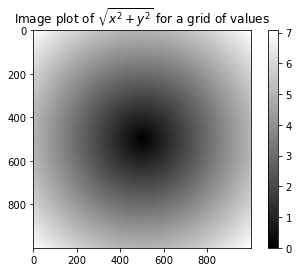

In [94]:
plt.imshow(z, cmap = plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

### Expressing Conditional Logic as Array Operations

The `numpy.where` function is a vectorized version of the ternary expression `x if condition else y`. Suppose we had a boolean array and two arrays of values:

In [95]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

Suppose we wanted to take a value from `xarr` whenever the corresponding value in `cond` is `True`, and otherwise take the value from `yarr`. A list comprehension doing this might look like:

In [96]:
result = [x if c else y for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

This has multiple problems. First, it will not be very fast for large arrays (because all the work is being done in interpreted Python code). Second, it will not work with multidimensional arrays. With `np.where` you can write this very concisely:

In [97]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [98]:
np.where?

The second and third arguments to `np.where` don’t need to be arrays; one or both of them can be scalars. A typical use of `where` in data analysis is to produce a new array of values based on another array.

In [99]:
arr = np.random.randn(4, 4)
arr

array([[ 2.00784295,  0.22696254, -1.15265911,  0.63197945],
       [ 0.03951269,  0.46439233, -3.56351666,  1.32110562],
       [ 0.15263055,  0.16452954, -0.43009569,  0.76736874],
       [ 0.98491984,  0.27083585,  1.39198619,  0.07984231]])

In [100]:
arr > 0

array([[ True,  True, False,  True],
       [ True,  True, False,  True],
       [ True,  True, False,  True],
       [ True,  True,  True,  True]])

In [101]:
np.where(arr > 0, 2, -2)

array([[ 2,  2, -2,  2],
       [ 2,  2, -2,  2],
       [ 2,  2, -2,  2],
       [ 2,  2,  2,  2]])

You can combine scalars and arrays when using `np.where`.

In [102]:
np.where(arr > 0, 2, arr)   # set only positive values to 2

array([[ 2.        ,  2.        , -1.15265911,  2.        ],
       [ 2.        ,  2.        , -3.56351666,  2.        ],
       [ 2.        ,  2.        , -0.43009569,  2.        ],
       [ 2.        ,  2.        ,  2.        ,  2.        ]])

### Mathematical and Statistical Methods

In [103]:
arr = np.random.randn(5, 4)
arr

array([[-0.39996458, -1.02785056, -0.58471821,  0.81659393],
       [-0.08194705, -0.34476601,  0.52828815, -1.06898878],
       [-0.51188131,  0.29120536,  0.5665337 ,  0.50359176],
       [ 0.28529568,  0.48428811,  1.36348151, -0.78110528],
       [-0.46801767,  1.22457436, -1.28110828,  0.8754755 ]])

In [104]:
arr.mean()

0.019449016098846632

In [105]:
np.mean(arr)

0.019449016098846632

In [106]:
arr.sum()

0.38898032197693266

Functions like `mean` and `sum` take an optional `axis` argument that computes the statistic over the given axis, resulting in an array with one fewer dimension:

In [107]:
arr.mean(axis = 1)

array([-0.29898486, -0.24185343,  0.21236238,  0.33799001,  0.08773098])

In [108]:
arr.sum(axis = 0)

array([-1.17651492,  0.62745125,  0.59247687,  0.34556712])

Here, `arr.mean(1)` means “compute mean across the columns” where `arr.sum(0)` means “compute sum down the rows.”

Other methods like `cumsum` and `cumprod` do not aggregate, instead producing an array of the intermediate results:

In [109]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In multidimensional arrays, accumulation functions like cumsum return an array of the same size, but with the partial aggregates computed along the indicated axis according to each lower dimensional slice:

In [110]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [111]:
arr.cumsum(axis = 0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [112]:
arr.cumprod(axis = 1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

### Methods for Boolean Arrays

Boolean values are coerced to 1 (`True`) and 0 (`False`) in the preceding methods. Thus, `sum` is often used as a means of counting `True` values in a boolean array:

In [113]:
arr = np.random.randn(100)
(arr > 0).sum()   # Number of positive values

47

There are two additional methods, `any` and `all`, useful especially for boolean arrays. `any` tests whether one or more values in an array is `True`, while `all` checks if every value is `True`:

In [114]:
bools = np.array([False, False, True, False])
print(bools.any())
print(bools.all())

True
False


These methods also work with non-boolean arrays, where non-zero elements evaluate to `True`.

#### Sorting

In [115]:
arr = np.random.randn(6)
arr

array([-0.54641628,  1.04394466,  2.10778515,  1.45992748,  1.01540546,
        0.7491846 ])

In [116]:
arr.sort()
arr

array([-0.54641628,  0.7491846 ,  1.01540546,  1.04394466,  1.45992748,
        2.10778515])

You can sort each one-dimensional section of values in a multidimensional array in-place along an axis by passing the axis number to `sort`:

In [117]:
arr = np.random.randn(5, 3)
arr

array([[-0.67552148,  0.44026639,  0.68897186],
       [-0.27664613,  1.92453332,  0.41120402],
       [ 0.89076496,  0.22636323, -2.07861789],
       [-0.38788623, -0.08710697,  1.12638582],
       [ 0.24711172,  0.12117181,  0.29898394]])

In [118]:
arr.sort(axis = 1)
arr

array([[-0.67552148,  0.44026639,  0.68897186],
       [-0.27664613,  0.41120402,  1.92453332],
       [-2.07861789,  0.22636323,  0.89076496],
       [-0.38788623, -0.08710697,  1.12638582],
       [ 0.12117181,  0.24711172,  0.29898394]])

The top-level method `np.sort` returns a sorted copy of an array instead of modifying the array in-place. A quick-and-dirty way to compute the quantiles of an array is to sort it and select the value at a particular rank:

In [119]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))]   # 5% quantile

-1.5927211354658712

### Unique and Other Set Logic

In [120]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [121]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## 4.4   File Input and Output with Arrays

`np.save` and `np.load` are the two workhorse functions for efficiently saving and loading array data on disk. Arrays are saved by default in an uncompressed raw binary format with file extension *.npy*:

In [122]:
arr = np.arange(10)
np.save("some_array", arr)

In [123]:
np.load("some_array.npy")

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

You save multiple arrays in an uncompressed archive using `np.savez` and passing the arrays as keyword arguments:

In [124]:
np.savez("array_archive.npz", a = arr, b = arr[::-1])

When loading an *.npz* file, you get back a dict-like object that loads the individual arrays lazily:

In [125]:
arch = np.load("array_archive.npz")
arch["b"]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

If your data compresses well, you may wish to use `numpy.savez_compressed` instead:

In [126]:
np.savez_compressed("arrays_compressed.npz", a = arr, b = arr[:4:-1])

In [127]:
comp = np.load("arrays_compressed.npz")
comp["b"]

array([9, 8, 7, 6, 5])

## 4.5   Linear Algebra

Unlike some languages like MATLAB, multiplying two two-dimensional arrays with `*` is an element-wise product instead of a matrix dot product. Thus, there is a function `dot`, both an array method and a function in the numpy namespace, for matrix multiplication:

In [128]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([[6, 23], [-1, 7], [8, 9]])

print(x)
print(y)

[[1 2 3]
 [4 5 6]]
[[ 6 23]
 [-1  7]
 [ 8  9]]


In [129]:
x.dot(y)

array([[ 28,  64],
       [ 67, 181]])

`x.dot(y)` is equivalent to `np.dot(x, y)`:

In [130]:
np.dot(x, y)

array([[ 28,  64],
       [ 67, 181]])

The `@` symbol (as of Python 3.5) also works as an infix operator that performs matrix multiplication:

In [131]:
x @ y

array([[ 28,  64],
       [ 67, 181]])

`numpy.linalg` has a standard set of matrix decompositions and things like inverse and determinant.

In [132]:
X = np.random.randn(5, 5)
mat = X.T.dot(X)
np.linalg.inv(mat)

array([[ 0.9225528 ,  2.33377565, -0.21269254,  1.88315062, -1.0766363 ],
       [ 2.33377565,  9.60889316,  1.46978568,  7.3512299 , -5.9047886 ],
       [-0.21269254,  1.46978568,  1.90626739,  1.06030236, -1.65820411],
       [ 1.88315062,  7.3512299 ,  1.06030236,  5.80739365, -4.46618915],
       [-1.0766363 , -5.9047886 , -1.65820411, -4.46618915,  4.21869072]])

In [133]:
mat.dot(np.linalg.inv(mat))

array([[ 1.00000000e+00,  7.79719291e-16, -1.29726803e-15,
        -4.75417614e-16, -4.79370210e-16],
       [-1.13627167e-15,  1.00000000e+00,  1.11727839e-15,
         8.28389463e-15,  1.53917124e-15],
       [-2.07038396e-16,  2.46665887e-16,  1.00000000e+00,
        -3.41710794e-16,  1.83326468e-15],
       [ 2.23054149e-15,  3.36907966e-15,  4.05179509e-16,
         1.00000000e+00,  8.41789427e-16],
       [-4.97811591e-16,  3.69338598e-16, -7.67485408e-16,
         2.63420651e-15,  1.00000000e+00]])

In [134]:
q, r = np.linalg.qr(mat)
print(q)
print(r)

[[-0.86176309 -0.01672678 -0.23090713 -0.43430187 -0.12307871]
 [ 0.1804182  -0.68476917  0.08834765 -0.1872959  -0.67502251]
 [-0.13587056 -0.12426499 -0.67624203  0.68764836 -0.18956227]
 [ 0.32216241  0.62946479 -0.36662074 -0.32387975 -0.51056497]
 [ 0.32025648 -0.34517196 -0.58920501 -0.44558251  0.48227149]]
[[-12.02109276   2.65940126  -1.35447479   5.30963656   5.81909439]
 [  0.          -7.35048751  -1.41032335   6.82859449  -3.69523561]
 [  0.           0.          -1.91629445  -2.15214937  -3.17129635]
 [  0.           0.           0.          -0.73722534  -0.88609726]
 [  0.           0.           0.           0.           0.11431781]]


In [135]:
np.diag(np.arange(6))

array([[0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0],
       [0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 4, 0],
       [0, 0, 0, 0, 0, 5]])

## 4.6   Pseudorandom Number Generation

You can get a 4 × 4 array of samples from the standard normal distribution using `normal`:

In [136]:
samples = np.random.normal(size = (4, 4))
samples

array([[-0.87667716, -1.5200622 ,  0.54481089,  0.89255886],
       [-0.62149312, -0.07875926, -0.15758092,  0.18987262],
       [ 0.81910194, -0.67365492,  1.18181848, -1.51121881],
       [-1.43784807,  1.70741375, -0.61097699, -0.69162847]])

Python’s built-in `random` module, by contrast, only samples one value at a time. As you can see from this benchmark, `numpy.random` is well over an order of magnitude faster for generating very large samples:

In [137]:
from random import normalvariate
N = 1000000

In [138]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

629 ms ± 17.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [139]:
%timeit np.random.normal(size = N)

24.2 ms ± 737 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


We say that these are *pseudorandom* numbers because they are generated by an algorithm with deterministic behavior based on the *seed* of the random number generator. You can change NumPy’s random number generation seed using `np.random.seed`.

The data generation functions in `numpy.random` use a global random seed. To avoid global state, you can use `numpy.random.RandomState` to create a random number generator isolated from others:

In [140]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

## 4.7   Example: Random Walks

Random walks using built-in `random` module:

In [141]:
import random

position = 0
walk = [position]
steps = 1000

for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

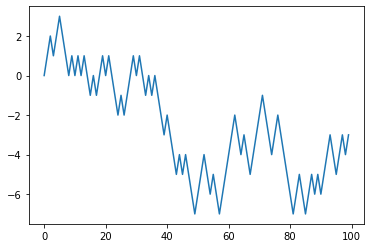

In [142]:
plt.plot(walk[:100])

Random walks using NumPy:

In [143]:
nsteps = 1000
draws = np.random.randint(0, 2, size = nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [145]:
print(walk.min())
print(walk.max())

-3
40


How long it took the random walk to get at least 10 steps away from the origin 0 in either direction:

In [146]:
(np.abs(walk) >= 10).argmax()

45

Note that using `argmax` here is not always efficient because it always makes a full scan of the array. In this special case, once a `True` is observed we know it to be the maximum value.

### Simulating Many Random Walks at Once

In [148]:
nwalks = 5000
nsteps = 1000

draws = np.random.randint(0, 2, size = (nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[-1, -2, -3, ...,  2,  3,  2],
       [-1,  0, -1, ..., 40, 39, 40],
       [ 1,  2,  3, ..., 18, 17, 18],
       ...,
       [ 1,  2,  1, ..., 16, 17, 16],
       [-1,  0,  1, ..., 18, 19, 18],
       [ 1,  2,  3, ..., 30, 29, 28]])

In [149]:
print(walks.min())
print(walks.max())

-125
110


In [150]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([False,  True,  True, ...,  True, False,  True])

In [151]:
hits30.sum()

3379

In [154]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

499.08464042616157